In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import os# Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib

In [2]:
home = os.getcwd() + '\\'

In [3]:
os.chdir('./result_data')

In [4]:
result_linear=pd.read_excel('linear_train_noC.xlsx')
result_Ridge=pd.read_excel('Ridge_train_noC.xlsx')
result_GBR=pd.read_excel('GBR_train_noC.xlsx')
result_BTR=pd.read_excel('BTR_train_noC.xlsx')
result_MLPR=pd.read_excel('MLPR_train_noC.xlsx')

predict_linear=pd.read_excel('linear_test_noC.xlsx')
predict_Ridge=pd.read_excel('Ridge_test_noC.xlsx')
predict_GBR=pd.read_excel('GBR_test_noC.xlsx')
predict_BTR=pd.read_excel('BTR_test_noC.xlsx')
predict_MLPR=pd.read_excel('MLPR_test_noC.xlsx')

In [5]:
result_linear2=pd.read_excel('linear_train.xlsx')
result_Ridge2=pd.read_excel('Ridge_train.xlsx')
result_GBR2=pd.read_excel('GBR_train.xlsx')
result_BTR2=pd.read_excel('BTR_train.xlsx')
result_MLPR2=pd.read_excel('MLPR_train.xlsx')

predict_linear2=pd.read_excel('linear_test.xlsx')
predict_Ridge2=pd.read_excel('Ridge_test.xlsx')
predict_GBR2=pd.read_excel('GBR_test.xlsx')
predict_BTR2=pd.read_excel('BTR_test.xlsx')
predict_MLPR2=pd.read_excel('MLPR_test.xlsx')

In [6]:
CMR_linear=pd.read_excel('Cumul_linear_train_noC.xlsx')
CMR_Ridge=pd.read_excel('Cumul_Ridge_train_noC.xlsx')
CMR_GBR=pd.read_excel('Cumul_GBR_train_noC.xlsx')
CMR_BTR=pd.read_excel('Cumul_BTR_train_noC.xlsx')
CMR_MLPR=pd.read_excel('Cumul_MLPR_train_noC.xlsx')

CMP_linear=pd.read_excel('Cumul_linear_test_noC.xlsx')
CMP_Ridge=pd.read_excel('Cumul_Ridge_test_noC.xlsx')
CMP_GBR=pd.read_excel('Cumul_GBR_test_noC.xlsx')
CMP_BTR=pd.read_excel('Cumul_BTR_test_noC.xlsx')
CMP_MLPR=pd.read_excel('Cumul_MLPR_test_noC.xlsx')

In [7]:
CMR_linear2=pd.read_excel('Cumul_linear_train.xlsx')
CMR_Ridge2=pd.read_excel('Cumul_Ridge_train.xlsx')
CMR_GBR2=pd.read_excel('Cumul_GBR_train.xlsx')
CMR_BTR2=pd.read_excel('Cumul_BTR_train.xlsx')
CMR_MLPR2=pd.read_excel('Cumul_MLPR_train.xlsx')

CMP_linear2=pd.read_excel('Cumul_linear_test.xlsx')
CMP_Ridge2=pd.read_excel('Cumul_Ridge_test.xlsx')
CMP_GBR2=pd.read_excel('Cumul_GBR_test.xlsx')
CMP_BTR2=pd.read_excel('Cumul_BTR_test.xlsx')
CMP_MLPR2=pd.read_excel('Cumul_MLPR_test.xlsx')

In [8]:
cols_result = list(result_BTR.columns)
cols_predict = list(predict_BTR.columns)

In [9]:
machine_values_new=['LR','Ridge','GBR','BTR','MLPR']

In [10]:
best_machine=['GBR','BTR']

In [11]:
result_sum=pd.read_excel('result_train_noC.xlsx')
predict_sum=pd.read_excel('result_test_noC.xlsx')
CMR_sum=pd.read_excel('cumul_result_train_noC.xlsx')
CMP_sum=pd.read_excel('cumul_result_test_noC.xlsx')
total_result=pd.read_excel('total_result_train_noC.xlsx')
total_predict=pd.read_excel('total_result_test_noC.xlsx')
Result_ACC=pd.read_excel('Result_accuracy.xlsx')

In [12]:
result_sum_2=pd.read_excel('result_train.xlsx')
predict_sum_2=pd.read_excel('result_test.xlsx')
CMR_sum_2=pd.read_excel('cumul_result_train.xlsx')
CMP_sum_2=pd.read_excel('cumul_result_test.xlsx')
total_result_2=pd.read_excel('total_result_train.xlsx')
total_predict_2=pd.read_excel('total_result_test.xlsx')
# Result_ACC=pd.read_excel('Result_accuracy.xlsx')

In [13]:
Nsudo_result=pd.DataFrame(columns={'Year'})
Nsudo_predict=pd.DataFrame(columns={'Year'})
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_result.loc[num,'Year']=i
        Nsudo_result.loc[num,'Month']=j
        Nsudo_result.loc[num,'Area']='NSudo'
        Nsudo_result.loc[num,'Incidence']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_result.loc[num,'linear_mean']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),result_linear.columns[3:len(result_linear.columns)]].sum().mean()
        Nsudo_result.loc[num,'linear_95+']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),result_linear.columns[3:len(result_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'linear_95-']=result_linear.loc[(result_linear['Year']==i) & (result_linear['Month']==j) & (result_linear['Area']!='Sudo'),result_linear.columns[3:len(result_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'Ridge_mean']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j) & (result_Ridge['Area']!='Sudo'),result_Ridge.columns[3:len(result_Ridge.columns)]].sum().mean()
        Nsudo_result.loc[num,'Ridge_95+']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j) & (result_Ridge['Area']!='Sudo'),result_Ridge.columns[3:len(result_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'Ridge_95-']=result_Ridge.loc[(result_Ridge['Year']==i) & (result_Ridge['Month']==j) & (result_Ridge['Area']!='Sudo'),result_Ridge.columns[3:len(result_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'GBR_mean']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j) & (result_GBR['Area']!='Sudo'),result_GBR.columns[3:len(result_GBR.columns)]].sum().mean()
        Nsudo_result.loc[num,'GBR_95+']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j) & (result_GBR['Area']!='Sudo'),result_GBR.columns[3:len(result_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'GBR_95-']=result_GBR.loc[(result_GBR['Year']==i) & (result_GBR['Month']==j) & (result_GBR['Area']!='Sudo'),result_GBR.columns[3:len(result_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'BTR_mean']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j) & (result_BTR['Area']!='Sudo'),result_BTR.columns[3:len(result_BTR.columns)]].sum().mean()
        Nsudo_result.loc[num,'BTR_95+']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j) & (result_BTR['Area']!='Sudo'),result_BTR.columns[3:len(result_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'BTR_95-']=result_BTR.loc[(result_BTR['Year']==i) & (result_BTR['Month']==j) & (result_BTR['Area']!='Sudo'),result_BTR.columns[3:len(result_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result.loc[num,'MLPR_mean']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j) & (result_MLPR['Area']!='Sudo'),result_MLPR.columns[3:len(result_MLPR.columns)]].sum().mean()
        Nsudo_result.loc[num,'MLPR_95+']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j) & (result_MLPR['Area']!='Sudo'),result_MLPR.columns[3:len(result_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_result.loc[num,'MLPR_95-']=result_MLPR.loc[(result_MLPR['Year']==i) & (result_MLPR['Month']==j) & (result_MLPR['Area']!='Sudo'),result_MLPR.columns[3:len(result_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_predict.loc[num,'Year']=i
        Nsudo_predict.loc[num,'Month']=j
        Nsudo_predict.loc[num,'Area']='NSudo'
        Nsudo_predict.loc[num,'Incidence']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_predict.loc[num,'linear_mean']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),predict_linear.columns[3:len(predict_linear.columns)]].sum().mean()
        Nsudo_predict.loc[num,'linear_95+']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),predict_linear.columns[3:len(predict_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'linear_95-']=predict_linear.loc[(predict_linear['Year']==i) & (predict_linear['Month']==j) & (predict_linear['Area']!='Sudo'),predict_linear.columns[3:len(predict_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'Ridge_mean']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j) & (predict_Ridge['Area']!='Sudo'),predict_Ridge.columns[3:len(predict_Ridge.columns)]].sum().mean()
        Nsudo_predict.loc[num,'Ridge_95+']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j) & (predict_Ridge['Area']!='Sudo'),predict_Ridge.columns[3:len(predict_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'Ridge_95-']=predict_Ridge.loc[(predict_Ridge['Year']==i) & (predict_Ridge['Month']==j) & (predict_Ridge['Area']!='Sudo'),predict_Ridge.columns[3:len(predict_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'GBR_mean']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j) & (predict_GBR['Area']!='Sudo'),predict_GBR.columns[3:len(predict_GBR.columns)]].sum().mean()
        Nsudo_predict.loc[num,'GBR_95+']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j) & (predict_GBR['Area']!='Sudo'),predict_GBR.columns[3:len(predict_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'GBR_95-']=predict_GBR.loc[(predict_GBR['Year']==i) & (predict_GBR['Month']==j) & (predict_GBR['Area']!='Sudo'),predict_GBR.columns[3:len(predict_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'BTR_mean']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j) & (predict_BTR['Area']!='Sudo'),predict_BTR.columns[3:len(predict_BTR.columns)]].sum().mean()
        Nsudo_predict.loc[num,'BTR_95+']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j) & (predict_BTR['Area']!='Sudo'),predict_BTR.columns[3:len(predict_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'BTR_95-']=predict_BTR.loc[(predict_BTR['Year']==i) & (predict_BTR['Month']==j) & (predict_BTR['Area']!='Sudo'),predict_BTR.columns[3:len(predict_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict.loc[num,'MLPR_mean']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j) & (predict_MLPR['Area']!='Sudo'),predict_MLPR.columns[3:len(predict_MLPR.columns)]].sum().mean()
        Nsudo_predict.loc[num,'MLPR_95+']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j) & (predict_MLPR['Area']!='Sudo'),predict_MLPR.columns[3:len(predict_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_predict.loc[num,'MLPR_95-']=predict_MLPR.loc[(predict_MLPR['Year']==i) & (predict_MLPR['Month']==j) & (predict_MLPR['Area']!='Sudo'),predict_MLPR.columns[3:len(predict_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [14]:
Sudo_result=result_sum[result_sum['Area']=='Sudo']
Sudo_predict=predict_sum[predict_sum['Area']=='Sudo']

total_result['Area']='Nation'
total_predict['Area']='Nation'

In [15]:
Sudo_result=Sudo_result[Nsudo_result.columns]
Sudo_predict=Sudo_predict[Nsudo_result.columns]
total_result=total_result[Nsudo_result.columns]
total_predict=total_predict[Nsudo_result.columns]

three_result=pd.concat([Sudo_result,Nsudo_result,total_result])
three_predict=pd.concat([Sudo_predict,Nsudo_predict,total_predict])
three_result.index=range(len(three_result))
three_predict.index=range(len(three_predict))

Nsudo_result_2=pd.DataFrame(columns={'Year'})
Nsudo_predict_2=pd.DataFrame(columns={'Year'})

In [16]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_result_2.loc[num,'Year']=i
        Nsudo_result_2.loc[num,'Month']=j
        Nsudo_result_2.loc[num,'Area']='NSudo'
        Nsudo_result_2.loc[num,'Incidence']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_result_2.loc[num,'linear_mean']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),result_linear2.columns[3:len(result_linear2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'linear_95+']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),result_linear2.columns[3:len(result_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'linear_95-']=result_linear2.loc[(result_linear2['Year']==i) & (result_linear2['Month']==j) & (result_linear2['Area']!='Sudo'),result_linear2.columns[3:len(result_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'Ridge_mean']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j) & (result_Ridge2['Area']!='Sudo'),result_Ridge2.columns[3:len(result_Ridge2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'Ridge_95+']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j) & (result_Ridge2['Area']!='Sudo'),result_Ridge2.columns[3:len(result_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'Ridge_95-']=result_Ridge2.loc[(result_Ridge2['Year']==i) & (result_Ridge2['Month']==j) & (result_Ridge2['Area']!='Sudo'),result_Ridge2.columns[3:len(result_Ridge2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'GBR_mean']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j) & (result_GBR2['Area']!='Sudo'),result_GBR2.columns[3:len(result_GBR2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'GBR_95+']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j) & (result_GBR2['Area']!='Sudo'),result_GBR2.columns[3:len(result_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'GBR_95-']=result_GBR2.loc[(result_GBR2['Year']==i) & (result_GBR2['Month']==j) & (result_GBR2['Area']!='Sudo'),result_GBR2.columns[3:len(result_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'BTR_mean']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j) & (result_BTR2['Area']!='Sudo'),result_BTR2.columns[3:len(result_BTR2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'BTR_95+']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j) & (result_BTR2['Area']!='Sudo'),result_BTR2.columns[3:len(result_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'BTR_95-']=result_BTR2.loc[(result_BTR2['Year']==i) & (result_BTR2['Month']==j) & (result_BTR2['Area']!='Sudo'),result_BTR2.columns[3:len(result_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_result_2.loc[num,'MLPR_mean']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j) & (result_MLPR2['Area']!='Sudo'),result_MLPR2.columns[3:len(result_MLPR2.columns)]].sum().mean()
        Nsudo_result_2.loc[num,'MLPR_95+']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j) & (result_MLPR2['Area']!='Sudo'),result_MLPR2.columns[3:len(result_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_result_2.loc[num,'MLPR_95-']=result_MLPR2.loc[(result_MLPR2['Year']==i) & (result_MLPR2['Month']==j) & (result_MLPR2['Area']!='Sudo'),result_MLPR2.columns[3:len(result_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_predict_2.loc[num,'Year']=i
        Nsudo_predict_2.loc[num,'Month']=j
        Nsudo_predict_2.loc[num,'Area']='NSudo'
        Nsudo_predict_2.loc[num,'Incidence']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_predict_2.loc[num,'linear_mean']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),predict_linear2.columns[3:len(predict_linear2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'linear_95+']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),predict_linear2.columns[3:len(predict_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'linear_95-']=predict_linear2.loc[(predict_linear2['Year']==i) & (predict_linear2['Month']==j) & (predict_linear2['Area']!='Sudo'),predict_linear2.columns[3:len(predict_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'Ridge_mean']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j) & (predict_Ridge2['Area']!='Sudo'),predict_Ridge2.columns[3:len(predict_Ridge2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'Ridge_95+']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j) & (predict_Ridge2['Area']!='Sudo'),predict_Ridge2.columns[3:len(predict_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'Ridge_95-']=predict_Ridge2.loc[(predict_Ridge2['Year']==i) & (predict_Ridge2['Month']==j) & (predict_Ridge2['Area']!='Sudo'),predict_Ridge2.columns[3:len(predict_Ridge2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'GBR_mean']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j) & (predict_GBR2['Area']!='Sudo'),predict_GBR2.columns[3:len(predict_GBR2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'GBR_95+']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j) & (predict_GBR2['Area']!='Sudo'),predict_GBR2.columns[3:len(predict_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'GBR_95-']=predict_GBR2.loc[(predict_GBR2['Year']==i) & (predict_GBR2['Month']==j) & (predict_GBR2['Area']!='Sudo'),predict_GBR2.columns[3:len(predict_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'BTR_mean']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j) & (predict_BTR2['Area']!='Sudo'),predict_BTR2.columns[3:len(predict_BTR2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'BTR_95+']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j) & (predict_BTR2['Area']!='Sudo'),predict_BTR2.columns[3:len(predict_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'BTR_95-']=predict_BTR2.loc[(predict_BTR2['Year']==i) & (predict_BTR2['Month']==j) & (predict_BTR2['Area']!='Sudo'),predict_BTR2.columns[3:len(predict_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_predict_2.loc[num,'MLPR_mean']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j) & (predict_MLPR2['Area']!='Sudo'),predict_MLPR2.columns[3:len(predict_MLPR2.columns)]].sum().mean()
        Nsudo_predict_2.loc[num,'MLPR_95+']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j) & (predict_MLPR2['Area']!='Sudo'),predict_MLPR2.columns[3:len(predict_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_predict_2.loc[num,'MLPR_95-']=predict_MLPR2.loc[(predict_MLPR2['Year']==i) & (predict_MLPR2['Month']==j) & (predict_MLPR2['Area']!='Sudo'),predict_MLPR2.columns[3:len(predict_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [17]:
Sudo_result_2=result_sum_2[result_sum_2['Area']=='Sudo']
Sudo_predict_2=predict_sum_2[predict_sum_2['Area']=='Sudo']

total_result_2['Area']='Nation'
total_predict_2['Area']='Nation'

total_result_2['Year']=total_result['Year']
total_predict_2['Year']=total_predict['Year']

Sudo_result_2=Sudo_result_2[Nsudo_result_2.columns]
Sudo_predict_2=Sudo_predict_2[Nsudo_result_2.columns]
total_result_2=total_result_2[Nsudo_result_2.columns]
total_predict_2=total_predict_2[Nsudo_result_2.columns]

three_result_2=pd.concat([Sudo_result_2,Nsudo_result_2,total_result_2])
three_predict_2=pd.concat([Sudo_predict_2,Nsudo_predict_2,total_predict_2])
three_result_2.index=range(len(three_result_2))
three_predict_2.index=range(len(three_predict_2))

Nsudo_CMR=pd.DataFrame(columns={'Year'})
Nsudo_CMP=pd.DataFrame(columns={'Year'})
total_CMR=pd.DataFrame(columns={'Year'})
total_CMP=pd.DataFrame(columns={'Year'})

Nsudo_CMR_2=pd.DataFrame(columns={'Year'})
Nsudo_CMP_2=pd.DataFrame(columns={'Year'})
total_CMR_2=pd.DataFrame(columns={'Year'})
total_CMP_2=pd.DataFrame(columns={'Year'})

In [18]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_CMR.loc[num,'Year']=i
        Nsudo_CMR.loc[num,'Month']=j
        Nsudo_CMR.loc[num,'Area']='NSudo'
        Nsudo_CMR.loc[num,'Incidence']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMR.loc[num,'linear_mean']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'linear_95+']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'linear_95-']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j) & (CMR_linear['Area']!='Sudo'),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'Ridge_mean']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'Ridge_95+']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'Ridge_95-']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'GBR_mean']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j) & (CMR_GBR['Area']!='Sudo'),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'GBR_95+']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j) & (CMR_GBR['Area']!='Sudo'),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'GBR_95-']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j) & (CMR_GBR['Area']!='Sudo'),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'BTR_mean']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j) & (CMR_BTR['Area']!='Sudo'),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'BTR_95+']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j) & (CMR_BTR['Area']!='Sudo'),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'BTR_95-']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j) & (CMR_BTR['Area']!='Sudo'),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR.loc[num,'MLPR_mean']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j) & (CMR_MLPR['Area']!='Sudo'),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().mean()
        Nsudo_CMR.loc[num,'MLPR_95+']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j) & (CMR_MLPR['Area']!='Sudo'),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR.loc[num,'MLPR_95-']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j) & (CMR_MLPR['Area']!='Sudo'),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_CMP.loc[num,'Year']=i
        Nsudo_CMP.loc[num,'Month']=j
        Nsudo_CMP.loc[num,'Area']='NSudo'
        Nsudo_CMP.loc[num,'Incidence']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMP.loc[num,'linear_mean']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'linear_95+']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'linear_95-']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'Ridge_mean']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j) & (CMP_Ridge['Area']!='Sudo'),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'Ridge_95+']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j) & (CMP_Ridge['Area']!='Sudo'),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'Ridge_95-']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j) & (CMP_Ridge['Area']!='Sudo'),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'GBR_mean']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j) & (CMP_GBR['Area']!='Sudo'),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'GBR_95+']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j) & (CMP_GBR['Area']!='Sudo'),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'GBR_95-']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j) & (CMP_GBR['Area']!='Sudo'),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'BTR_mean']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j) & (CMP_BTR['Area']!='Sudo'),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'BTR_95+']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j) & (CMP_BTR['Area']!='Sudo'),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'BTR_95-']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j) & (CMP_BTR['Area']!='Sudo'),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP.loc[num,'MLPR_mean']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j) & (CMP_MLPR['Area']!='Sudo'),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().mean()
        Nsudo_CMP.loc[num,'MLPR_95+']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j) & (CMP_MLPR['Area']!='Sudo'),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP.loc[num,'MLPR_95-']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j) & (CMP_MLPR['Area']!='Sudo'),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [19]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        total_CMR.loc[num,'Year']=i
        total_CMR.loc[num,'Month']=j
        total_CMR.loc[num,'Area']='Nation'
        total_CMR.loc[num,'Incidence']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),'Incidence'].sum()
        
        total_CMR.loc[num,'linear_mean']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().mean()
        total_CMR.loc[num,'linear_95+']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'linear_95-']=CMR_linear.loc[(CMR_linear['Year']==i) & (CMR_linear['Month']==j),CMR_linear.columns[3:len(CMR_linear.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'Ridge_mean']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().mean()
        total_CMR.loc[num,'Ridge_95+']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'Ridge_95-']=CMR_Ridge.loc[(CMR_Ridge['Year']==i) & (CMR_Ridge['Month']==j) & (CMR_Ridge['Area']!='Sudo'),CMR_Ridge.columns[3:len(CMR_Ridge.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'GBR_mean']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().mean()
        total_CMR.loc[num,'GBR_95+']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'GBR_95-']=CMR_GBR.loc[(CMR_GBR['Year']==i) & (CMR_GBR['Month']==j),CMR_GBR.columns[3:len(CMR_GBR.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'BTR_mean']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().mean()
        total_CMR.loc[num,'BTR_95+']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'BTR_95-']=CMR_BTR.loc[(CMR_BTR['Year']==i) & (CMR_BTR['Month']==j),CMR_BTR.columns[3:len(CMR_BTR.columns)]].sum().quantile(q=0.025)
        
        total_CMR.loc[num,'MLPR_mean']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().mean()
        total_CMR.loc[num,'MLPR_95+']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.975)
        total_CMR.loc[num,'MLPR_95-']=CMR_MLPR.loc[(CMR_MLPR['Year']==i) & (CMR_MLPR['Month']==j),CMR_MLPR.columns[3:len(CMR_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        total_CMP.loc[num,'Year']=i
        total_CMP.loc[num,'Month']=j
        total_CMP.loc[num,'Area']='Nation'
        total_CMP.loc[num,'Incidence']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j),'Incidence'].sum()
        
        total_CMP.loc[num,'linear_mean']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().mean()
        total_CMP.loc[num,'linear_95+']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'linear_95-']=CMP_linear.loc[(CMP_linear['Year']==i) & (CMP_linear['Month']==j) & (CMP_linear['Area']!='Sudo'),CMP_linear.columns[3:len(CMP_linear.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'Ridge_mean']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().mean()
        total_CMP.loc[num,'Ridge_95+']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'Ridge_95-']=CMP_Ridge.loc[(CMP_Ridge['Year']==i) & (CMP_Ridge['Month']==j),CMP_Ridge.columns[3:len(CMP_Ridge.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'GBR_mean']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().mean()
        total_CMP.loc[num,'GBR_95+']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'GBR_95-']=CMP_GBR.loc[(CMP_GBR['Year']==i) & (CMP_GBR['Month']==j),CMP_GBR.columns[3:len(CMP_GBR.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'BTR_mean']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().mean()
        total_CMP.loc[num,'BTR_95+']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'BTR_95-']=CMP_BTR.loc[(CMP_BTR['Year']==i) & (CMP_BTR['Month']==j),CMP_BTR.columns[3:len(CMP_BTR.columns)]].sum().quantile(q=0.025)
        
        total_CMP.loc[num,'MLPR_mean']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().mean()
        total_CMP.loc[num,'MLPR_95+']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.975)
        total_CMP.loc[num,'MLPR_95-']=CMP_MLPR.loc[(CMP_MLPR['Year']==i) & (CMP_MLPR['Month']==j),CMP_MLPR.columns[3:len(CMP_MLPR.columns)]].sum().quantile(q=0.025)
        num=num+1

In [20]:
Sudo_CMR=CMR_sum[CMR_sum['Area']=='Sudo']
Sudo_CMP=CMP_sum[CMP_sum['Area']=='Sudo']

Sudo_CMR=Sudo_CMR[Nsudo_CMR.columns]
Sudo_CMP=Sudo_CMP[Nsudo_CMR.columns]
total_CMR=total_CMR[Nsudo_CMR.columns]
total_CMP=total_CMP[Nsudo_CMR.columns]

three_CMR=pd.concat([Sudo_CMR,Nsudo_CMR,total_CMR])
three_CMP=pd.concat([Sudo_CMP,Nsudo_CMP,total_CMP])
three_CMR.index=range(len(three_CMR))
three_CMP.index=range(len(three_CMP))

In [21]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        Nsudo_CMR_2.loc[num,'Year']=i
        Nsudo_CMR_2.loc[num,'Month']=j
        Nsudo_CMR_2.loc[num,'Area']='NSudo'
        Nsudo_CMR_2.loc[num,'Incidence']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMR_2.loc[num,'linear_mean']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'linear_95+']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'linear_95-']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j) & (CMR_linear2['Area']!='Sudo'),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR_2.loc[num,'Ridge_mean']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'Ridge_95+']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'Ridge_95-']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.025)
  
        Nsudo_CMR_2.loc[num,'GBR_mean']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j) & (CMR_GBR2['Area']!='Sudo'),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'GBR_95+']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j) & (CMR_GBR2['Area']!='Sudo'),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'GBR_95-']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j) & (CMR_GBR2['Area']!='Sudo'),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR_2.loc[num,'BTR_mean']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j) & (CMR_BTR2['Area']!='Sudo'),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'BTR_95+']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j) & (CMR_BTR2['Area']!='Sudo'),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'BTR_95-']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j) & (CMR_BTR2['Area']!='Sudo'),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMR_2.loc[num,'MLPR_mean']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j) & (CMR_MLPR2['Area']!='Sudo'),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().mean()
        Nsudo_CMR_2.loc[num,'MLPR_95+']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j) & (CMR_MLPR2['Area']!='Sudo'),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMR_2.loc[num,'MLPR_95-']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j) & (CMR_MLPR2['Area']!='Sudo'),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        Nsudo_CMP_2.loc[num,'Year']=i
        Nsudo_CMP_2.loc[num,'Month']=j
        Nsudo_CMP_2.loc[num,'Area']='NSudo'
        Nsudo_CMP_2.loc[num,'Incidence']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),'Incidence'].sum()
        
        Nsudo_CMP_2.loc[num,'linear_mean']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'linear_95+']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'linear_95-']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j) & (CMP_linear2['Area']!='Sudo'),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'Ridge_mean']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'Ridge_95+']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'Ridge_95-']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'GBR_mean']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j) & (CMP_GBR2['Area']!='Sudo'),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'GBR_95+']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j) & (CMP_GBR2['Area']!='Sudo'),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'GBR_95-']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j) & (CMP_GBR2['Area']!='Sudo'),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'BTR_mean']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j) & (CMP_BTR2['Area']!='Sudo'),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'BTR_95+']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j) & (CMP_BTR2['Area']!='Sudo'),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'BTR_95-']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j) & (CMP_BTR2['Area']!='Sudo'),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.025)
        
        Nsudo_CMP_2.loc[num,'MLPR_mean']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j) & (CMP_MLPR2['Area']!='Sudo'),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().mean()
        Nsudo_CMP_2.loc[num,'MLPR_95+']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j) & (CMP_MLPR2['Area']!='Sudo'),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.975)
        Nsudo_CMP_2.loc[num,'MLPR_95-']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j) & (CMP_MLPR2['Area']!='Sudo'),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [22]:
num=0
for i in range(2016,2019):
    for j in range(1,13):
        total_CMR_2.loc[num,'Year']=i
        total_CMR_2.loc[num,'Month']=j
        total_CMR_2.loc[num,'Area']='Nation'
        total_CMR_2.loc[num,'Incidence']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),'Incidence'].sum()
        
        total_CMR_2.loc[num,'linear_mean']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().mean()
        total_CMR_2.loc[num,'linear_95+']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'linear_95-']=CMR_linear2.loc[(CMR_linear2['Year']==i) & (CMR_linear2['Month']==j),CMR_linear2.columns[3:len(CMR_linear2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'Ridge_mean']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().mean()
        total_CMR_2.loc[num,'Ridge_95+']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'Ridge_95-']=CMR_Ridge2.loc[(CMR_Ridge2['Year']==i) & (CMR_Ridge2['Month']==j) & (CMR_Ridge2['Area']!='Sudo'),CMR_Ridge2.columns[3:len(CMR_Ridge2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'GBR_mean']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().mean()
        total_CMR_2.loc[num,'GBR_95+']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'GBR_95-']=CMR_GBR2.loc[(CMR_GBR2['Year']==i) & (CMR_GBR2['Month']==j),CMR_GBR2.columns[3:len(CMR_GBR2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'BTR_mean']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().mean()
        total_CMR_2.loc[num,'BTR_95+']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'BTR_95-']=CMR_BTR2.loc[(CMR_BTR2['Year']==i) & (CMR_BTR2['Month']==j),CMR_BTR2.columns[3:len(CMR_BTR2.columns)]].sum().quantile(q=0.025)
        
        total_CMR_2.loc[num,'MLPR_mean']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().mean()
        total_CMR_2.loc[num,'MLPR_95+']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.975)
        total_CMR_2.loc[num,'MLPR_95-']=CMR_MLPR2.loc[(CMR_MLPR2['Year']==i) & (CMR_MLPR2['Month']==j),CMR_MLPR2.columns[3:len(CMR_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1
        
num=0
for i in range(2019,2020):
    for j in range(1,13):
        total_CMP_2.loc[num,'Year']=i
        total_CMP_2.loc[num,'Month']=j
        total_CMP_2.loc[num,'Area']='Nation'
        total_CMP_2.loc[num,'Incidence']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),'Incidence'].sum()
        
        total_CMP_2.loc[num,'linear_mean']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().mean()
        total_CMP_2.loc[num,'linear_95+']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'linear_95-']=CMP_linear2.loc[(CMP_linear2['Year']==i) & (CMP_linear2['Month']==j),CMP_linear2.columns[3:len(CMP_linear2.columns)]].sum().quantile(q=0.025)
        
        total_CMP_2.loc[num,'Ridge_mean']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().mean()
        total_CMP_2.loc[num,'Ridge_95+']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'Ridge_95-']=CMP_Ridge2.loc[(CMP_Ridge2['Year']==i) & (CMP_Ridge2['Month']==j) & (CMP_Ridge2['Area']!='Sudo'),CMP_Ridge2.columns[3:len(CMP_Ridge2.columns)]].sum().quantile(q=0.025)

        total_CMP_2.loc[num,'GBR_mean']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().mean()
        total_CMP_2.loc[num,'GBR_95+']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'GBR_95-']=CMP_GBR2.loc[(CMP_GBR2['Year']==i) & (CMP_GBR2['Month']==j),CMP_GBR2.columns[3:len(CMP_GBR2.columns)]].sum().quantile(q=0.025)
        
        total_CMP_2.loc[num,'BTR_mean']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().mean()
        total_CMP_2.loc[num,'BTR_95+']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'BTR_95-']=CMP_BTR2.loc[(CMP_BTR2['Year']==i) & (CMP_BTR2['Month']==j),CMP_BTR2.columns[3:len(CMP_BTR2.columns)]].sum().quantile(q=0.025)
        
        total_CMP_2.loc[num,'MLPR_mean']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().mean()
        total_CMP_2.loc[num,'MLPR_95+']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.975)
        total_CMP_2.loc[num,'MLPR_95-']=CMP_MLPR2.loc[(CMP_MLPR2['Year']==i) & (CMP_MLPR2['Month']==j),CMP_MLPR2.columns[3:len(CMP_MLPR2.columns)]].sum().quantile(q=0.025)
        num=num+1

In [23]:
Sudo_CMR_2=CMR_sum_2[CMR_sum_2['Area']=='Sudo']
Sudo_CMP_2=CMP_sum_2[CMP_sum_2['Area']=='Sudo']

Sudo_CMR_2=Sudo_CMR_2[Nsudo_CMR_2.columns]
Sudo_CMP_2=Sudo_CMP_2[Nsudo_CMR_2.columns]
total_CMR_2=total_CMR_2[Nsudo_CMR_2.columns]
total_CMP_2=total_CMP_2[Nsudo_CMR_2.columns]

three_CMR_2=pd.concat([Sudo_CMR_2,Nsudo_CMR_2,total_CMR_2])
three_CMP_2=pd.concat([Sudo_CMP_2,Nsudo_CMP_2,total_CMP_2])
three_CMR_2.index=range(len(three_CMR_2))
three_CMP_2.index=range(len(three_CMP_2))

In [24]:
three_predict.loc[three_predict['Area']=='Sudo','Area']='Capital area'
three_predict_2.loc[three_predict_2['Area']=='Sudo','Area']='Capital area'
three_predict.loc[three_predict['Area']=='NSudo','Area']='Non-capital area'
three_predict_2.loc[three_predict_2['Area']=='NSudo','Area']='Non-capital area'
three_predict.loc[three_predict['Area']=='Nation','Area']='Korea'
three_predict_2.loc[three_predict_2['Area']=='Nation','Area']='Korea'

predict_sum.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

predict_sum_2.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

CMP_sum.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

CMP_sum_2.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

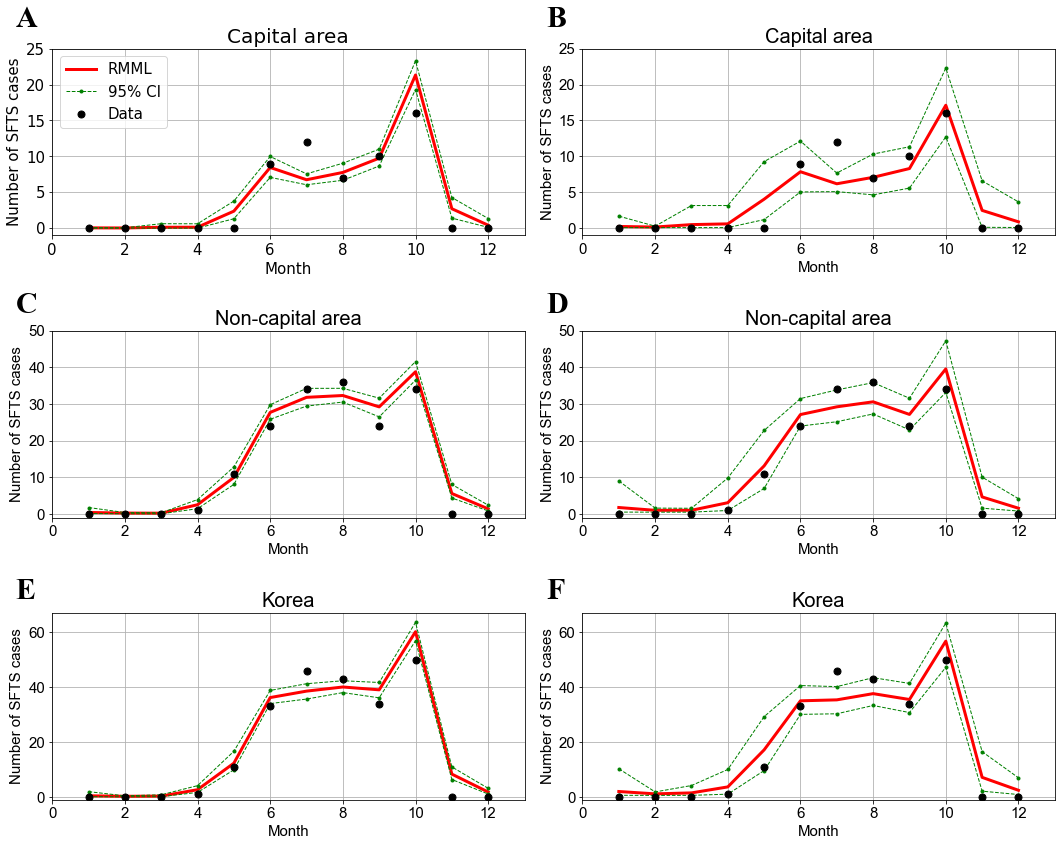

In [25]:
matplotlib.rcParams.update({'font.size': 15})
num=1
num_j=1;
plt.figure(figsize=(15,12))
for i in list(collections.Counter(three_predict['Area']).keys()):
    for j in ['GBR','BTR']:
#         plt.figure(figsize=(7,4))
#         plt.rc('axes', labelsize=10)
        plt.subplot(len(list(collections.Counter(three_predict['Area']).keys())),len(['GBR','BTR']),num)
        x = three_predict.loc[three_predict['Area']==i,'Month']
        y = three_predict.loc[three_predict['Area']==i,'Incidence']
        y_pre = three_predict.loc[three_predict['Area']==i,j+'_mean']
        y_pre1 = three_predict.loc[three_predict['Area']==i,j+'_95+']
        y_pre2 = three_predict.loc[three_predict['Area']==i,j+'_95-']
#         lines = plt.plot(x, y, '*k',x, y_pre, 'r',x, y_pre1,'--oy', x, y_pre2,'--og')
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        if (num==1):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'A', fontdict=font2)
        if (num==2):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'B', fontdict=font2)
        if (num==3):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'C', fontdict=font2)
        if (num==4):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'D', fontdict=font2)
        if (num==5):
            plt.xlim([0, 13])
            plt.ylim([-1, 67])
            plt.text(-1, 72, 'E', fontdict=font2)
        if (num==6):
            plt.xlim([0, 13])
            plt.ylim([-1, 67])
            plt.text(-1, 72, 'F', fontdict=font2)
#         plt.xlabels(fontsize=16)
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.labelsize=10
#         plt.ylim([-0.5, max(y_pre1)+1])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('RMML', '95% CI','Data'), fontsize=15,loc='best')#'upper right')
#             plt.legend(('Infectious', 'Predict', 'confidence 95%+', 'confidence 95%-'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=20)
        plt.title(i)
        plt.rcParams['font.family'] = 'Arial'
        plt.tight_layout()
#         plt.savefig('fig5_'+str(num)+'.tiff', dpi=300)
        num=num+1
plt.show()

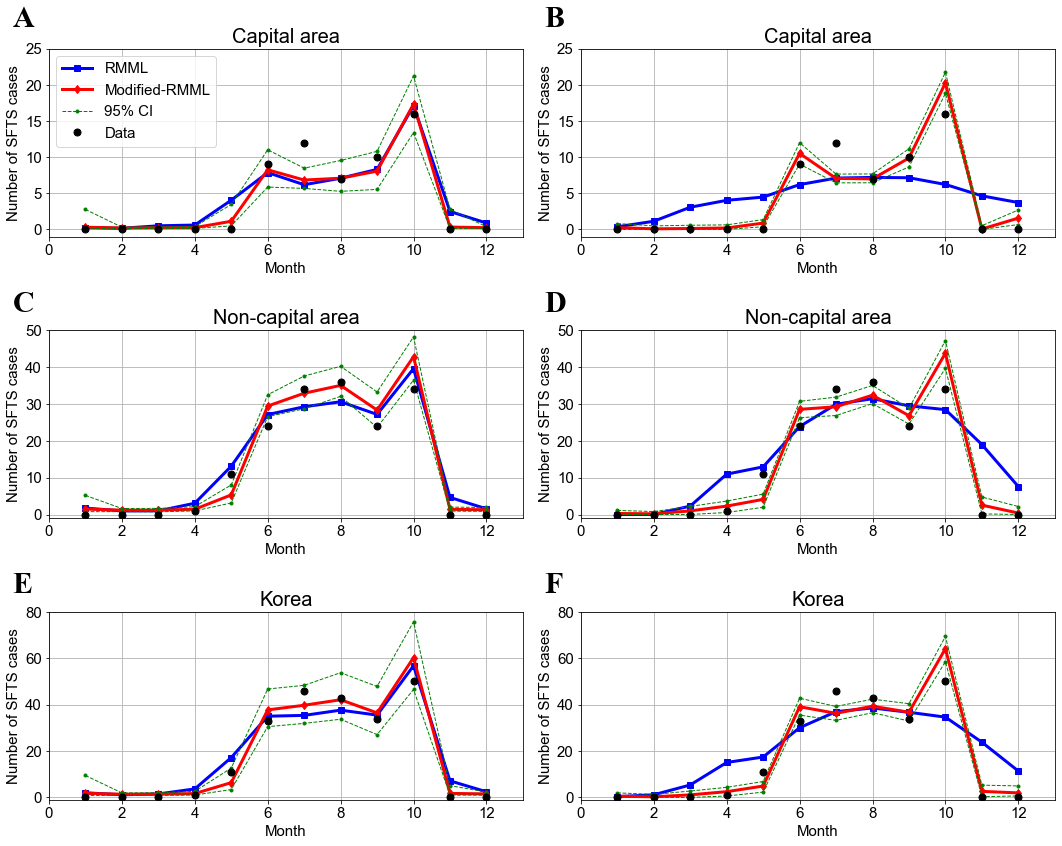

In [26]:
num=1
num_j=1;
plt.figure(figsize=(15,12))
for i in list(collections.Counter(three_predict['Area']).keys()):
    for j in ['BTR','MLPR']:
#         plt.figure(figsize=(7,4))
        plt.subplot(len(list(collections.Counter(three_predict['Area']).keys())),len(['BTR','MLPR']),num)
        x = three_predict.loc[three_predict['Area']==i,'Month']
        y = three_predict.loc[three_predict['Area']==i,'Incidence']
        y_pre = three_predict.loc[three_predict['Area']==i,j+'_mean']
        y_pre1 = three_predict_2.loc[three_predict_2['Area']==i,j+'_mean']
        y_pre2 = three_predict_2.loc[three_predict_2['Area']==i,j+'_95+']
        y_pre3 = three_predict_2.loc[three_predict_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        if (num==1):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'A', fontdict=font2)
        if (num==2):
            plt.xlim([0, 13])
            plt.ylim([-1, 25])
            plt.text(-1, 28, 'B', fontdict=font2)
        if (num==3):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'C', fontdict=font2)
        if (num==4):
            plt.xlim([0, 13])
            plt.ylim([-1, 50])
            plt.text(-1, 55, 'D', fontdict=font2)
        if (num==5):
            plt.xlim([0, 13])
            plt.ylim([-1, 80])
            plt.text(-1, 88, 'E', fontdict=font2)
        if (num==6):
            plt.xlim([0, 13])
            plt.ylim([-1, 80])
            plt.text(-1, 88, 'F', fontdict=font2)
            
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.grid(True)
#         plt.ylim([0, 22])
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=15,loc='best')#'upper right')
#             plt.legend(('RMML', 'Modified-RMML', '95% CI','','Data'), fontsize=15,loc='best')#'upper right')
        plt.rc('axes', titlesize=20)
        plt.title(i)
        plt.rcParams['font.family'] = 'Arial'
        plt.tight_layout()
        num=num+1
plt.show()

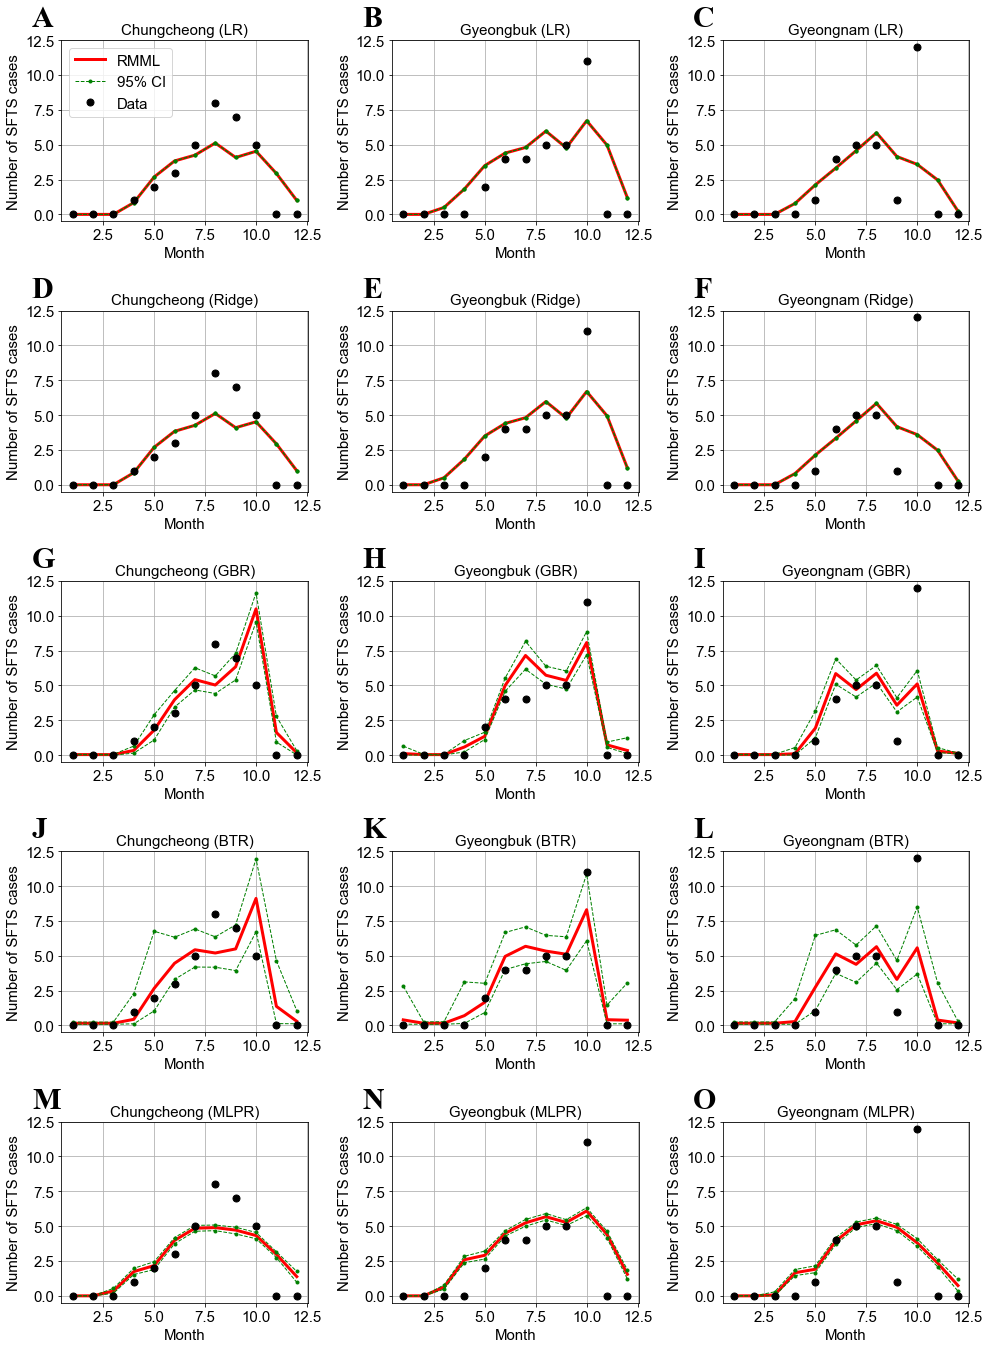

In [27]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[1:4]:
#         plt.figure(figsize=(7,4))
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[1:4]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum.loc[predict_sum['Area']==i,j+'_95+']
        y_pre2 = predict_sum.loc[predict_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
            
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

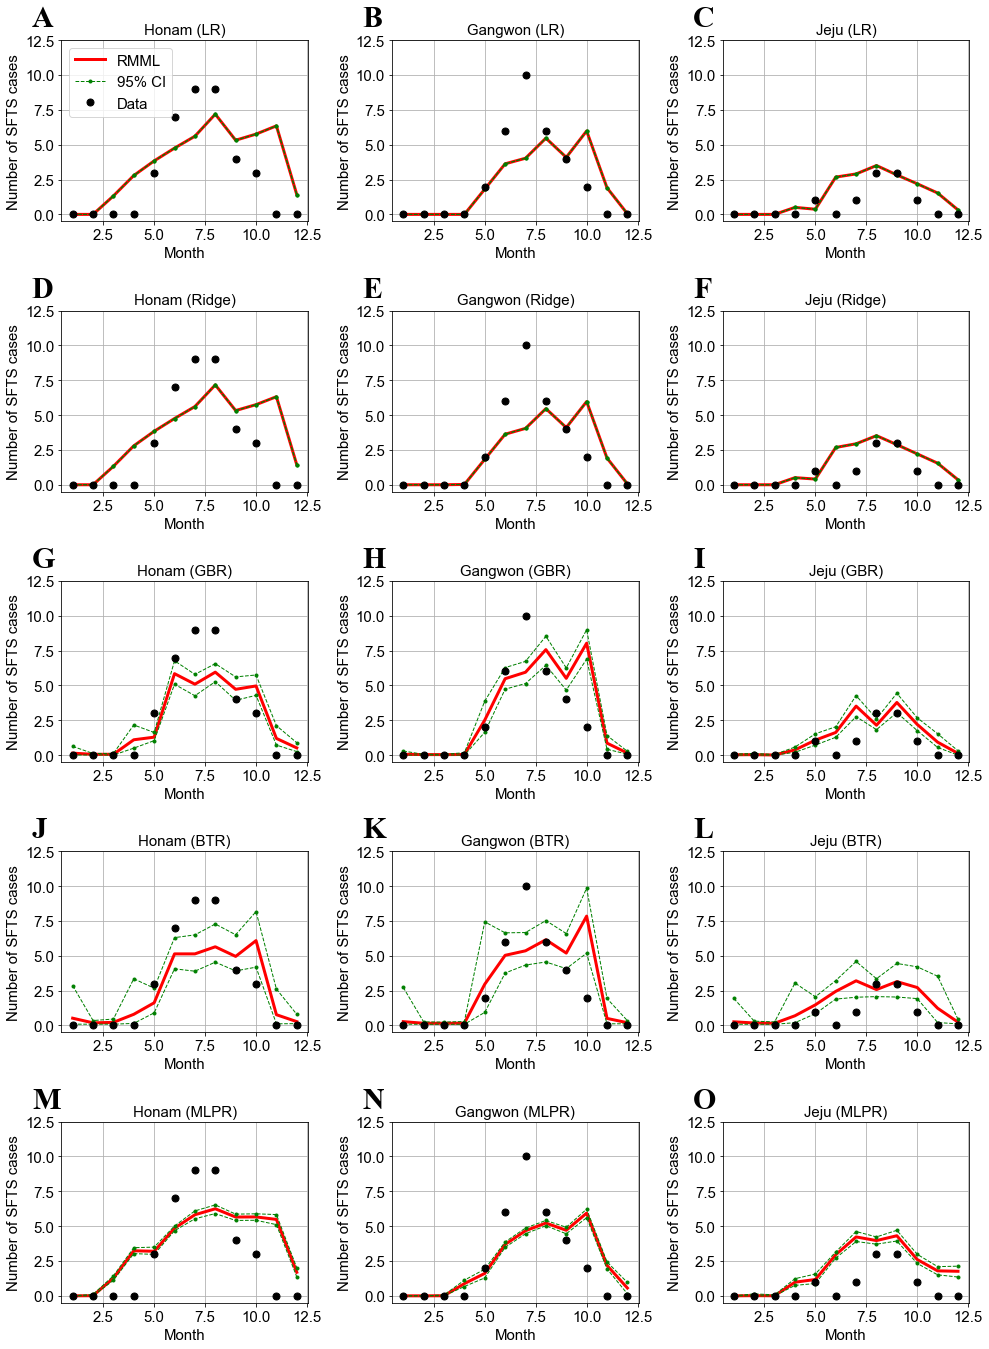

In [28]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[4:7]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum.loc[predict_sum['Area']==i,j+'_95+']
        y_pre2 = predict_sum.loc[predict_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

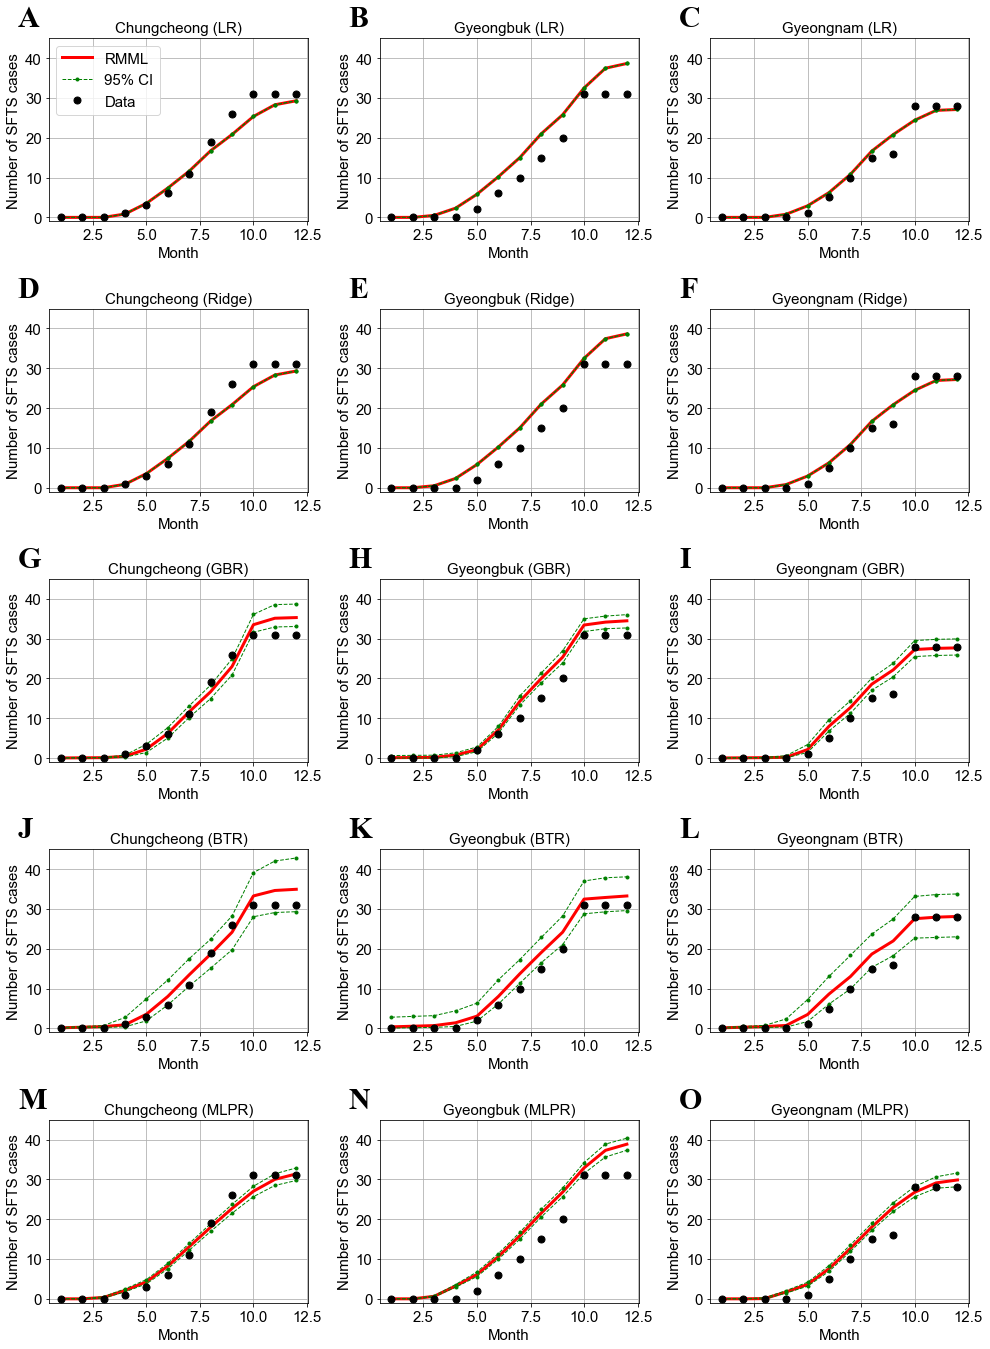

In [29]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[1:4]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[1:4]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95+']
        y_pre2 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

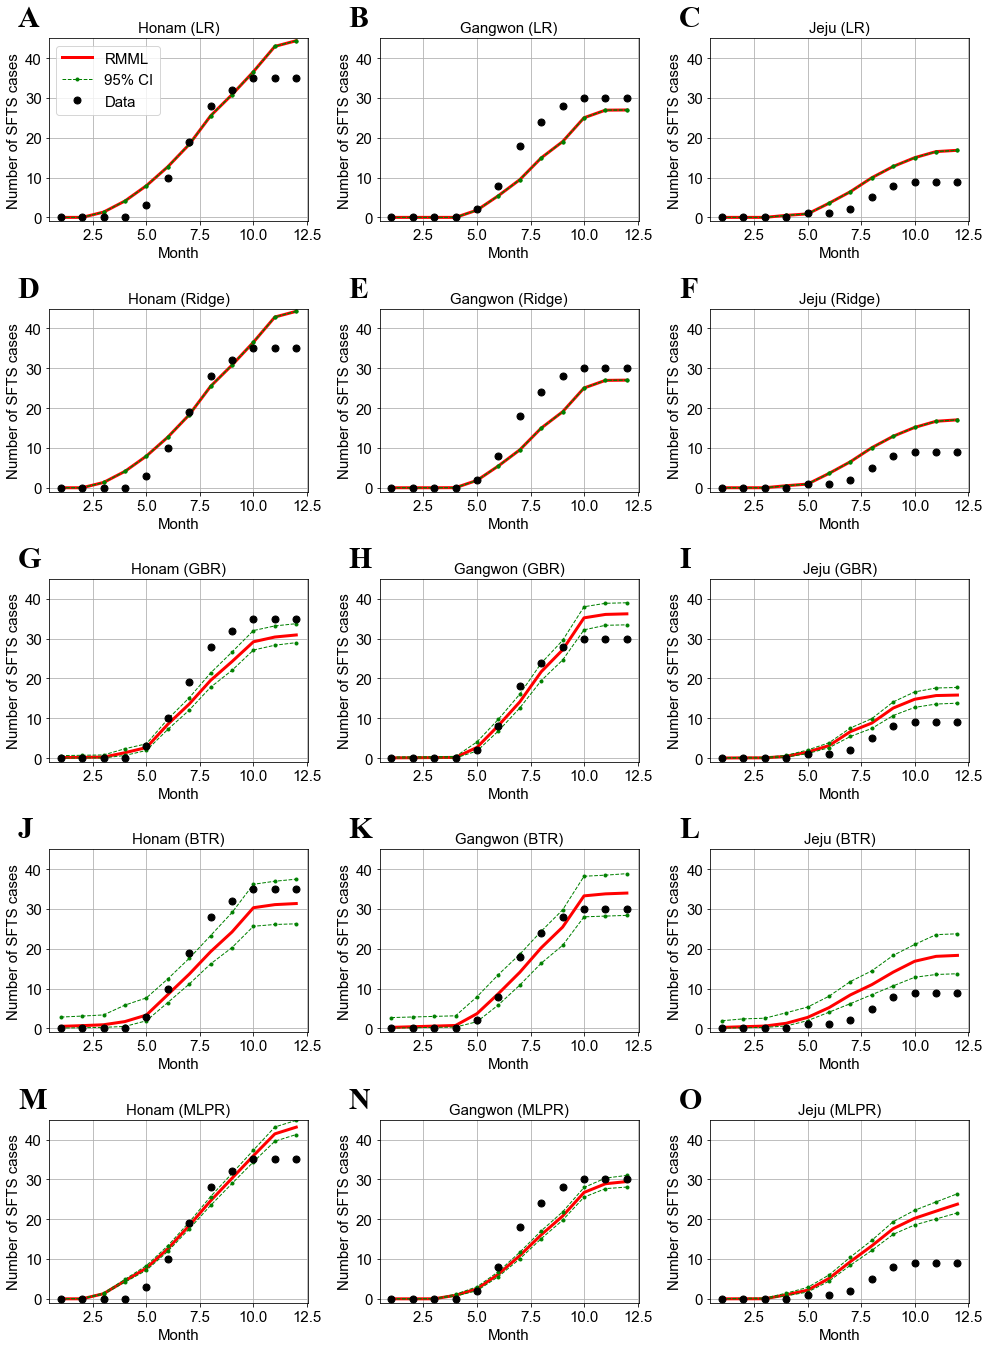

In [30]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[4:7]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95+']
        y_pre2 = CMP_sum.loc[CMP_sum['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'r',x, y_pre1,'--.g', x, y_pre2,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=1)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], markersize=7)
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[3]),labels=('RMML', '95% CI','Data'), fontsize=15,loc='best')
#             plt.legend(('Data', 'Estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

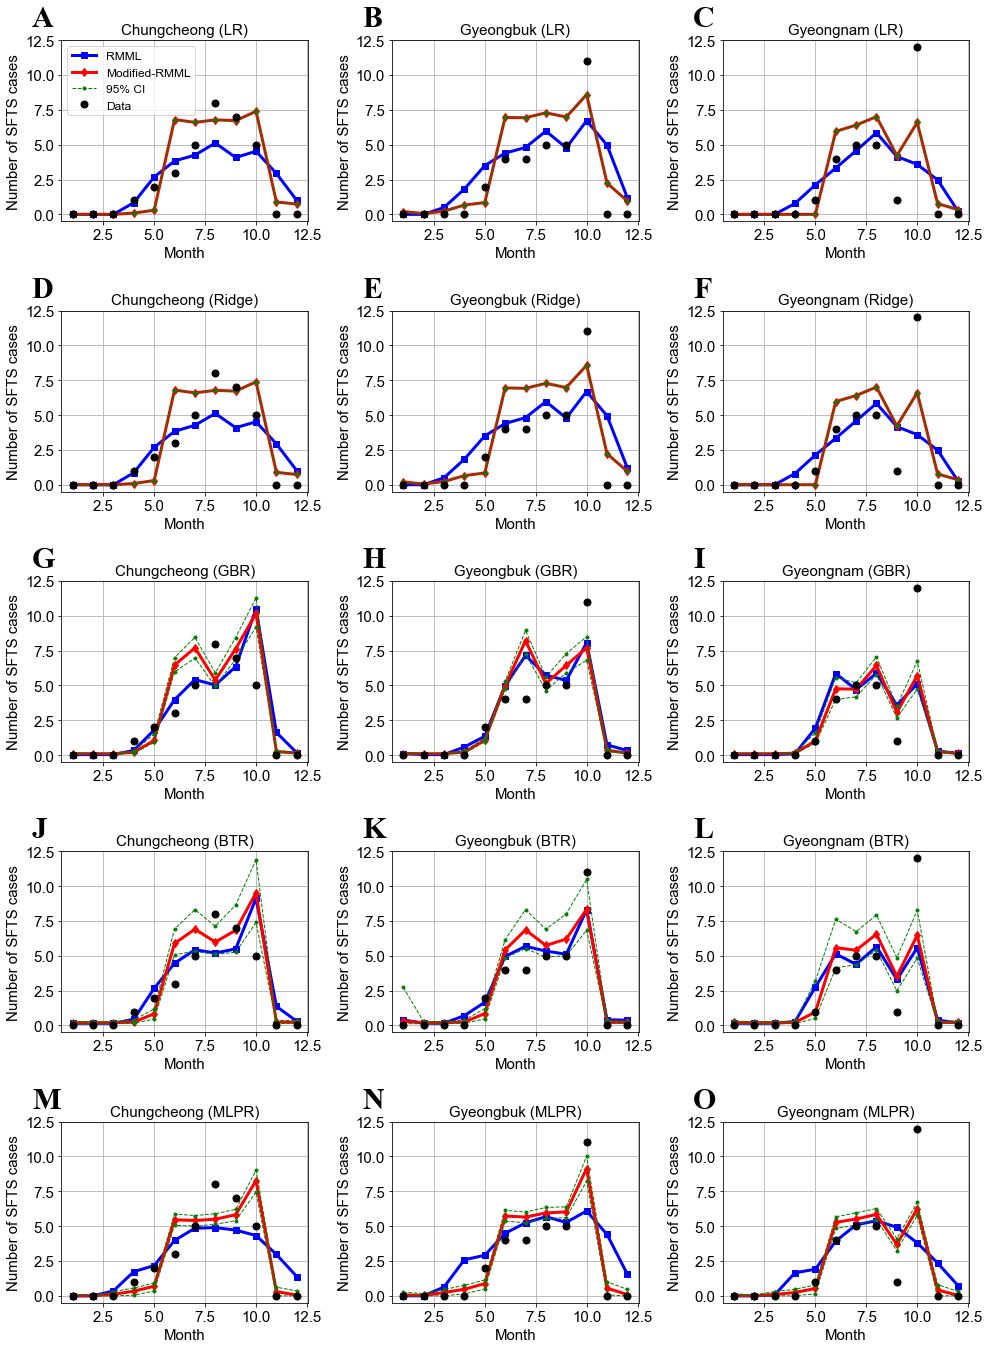

In [31]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[1:4]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[1:4]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_mean']
        y_pre2 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95+']
        y_pre3 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

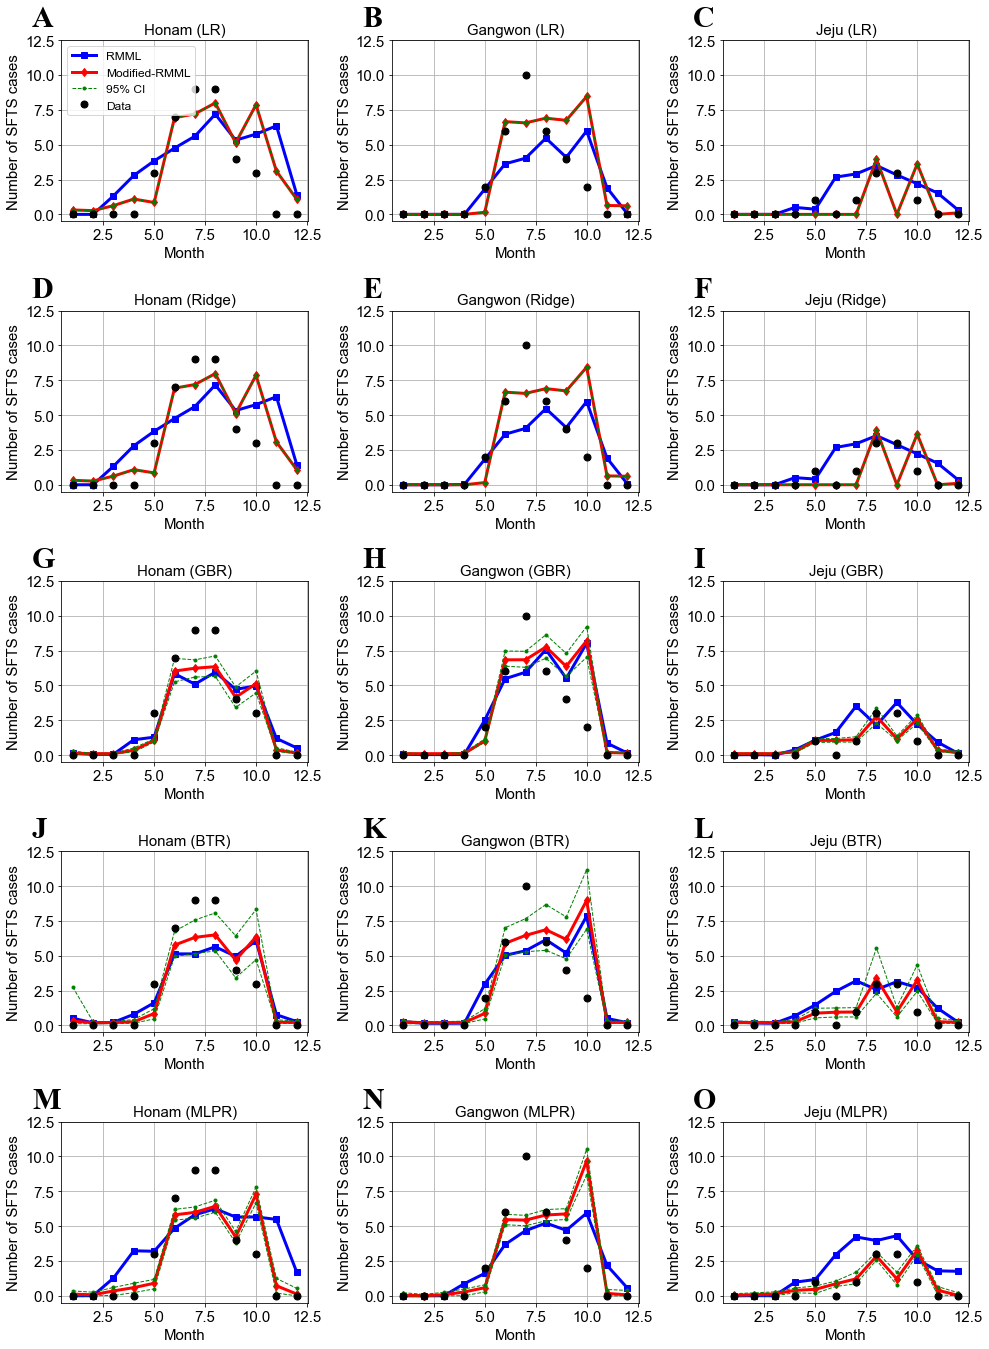

In [32]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(predict_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(predict_sum['Area']).keys())[4:7]),num)
        x = predict_sum.loc[predict_sum['Area']==i,'Month']
        y = predict_sum.loc[predict_sum['Area']==i,'Incidence']
        y_pre = predict_sum.loc[predict_sum['Area']==i,j+'_mean']
        y_pre1 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_mean']
        y_pre2 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95+']
        y_pre3 = predict_sum_2.loc[predict_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 13.5, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-0.5, 12.5])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

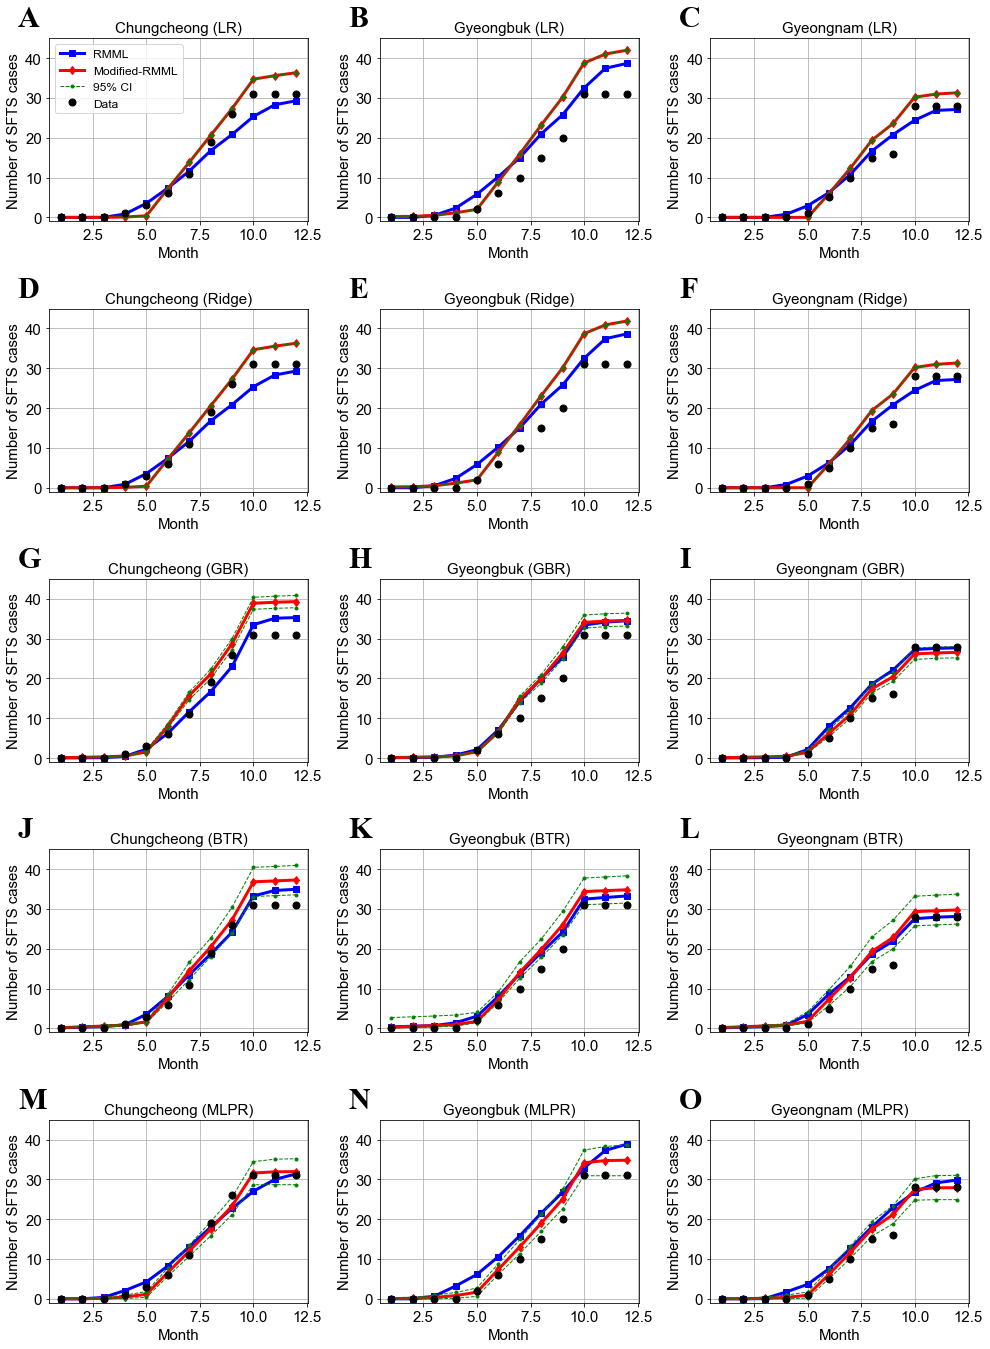

In [33]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[1:4]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[1:4]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_mean']
        y_pre2 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95+']
        y_pre3 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

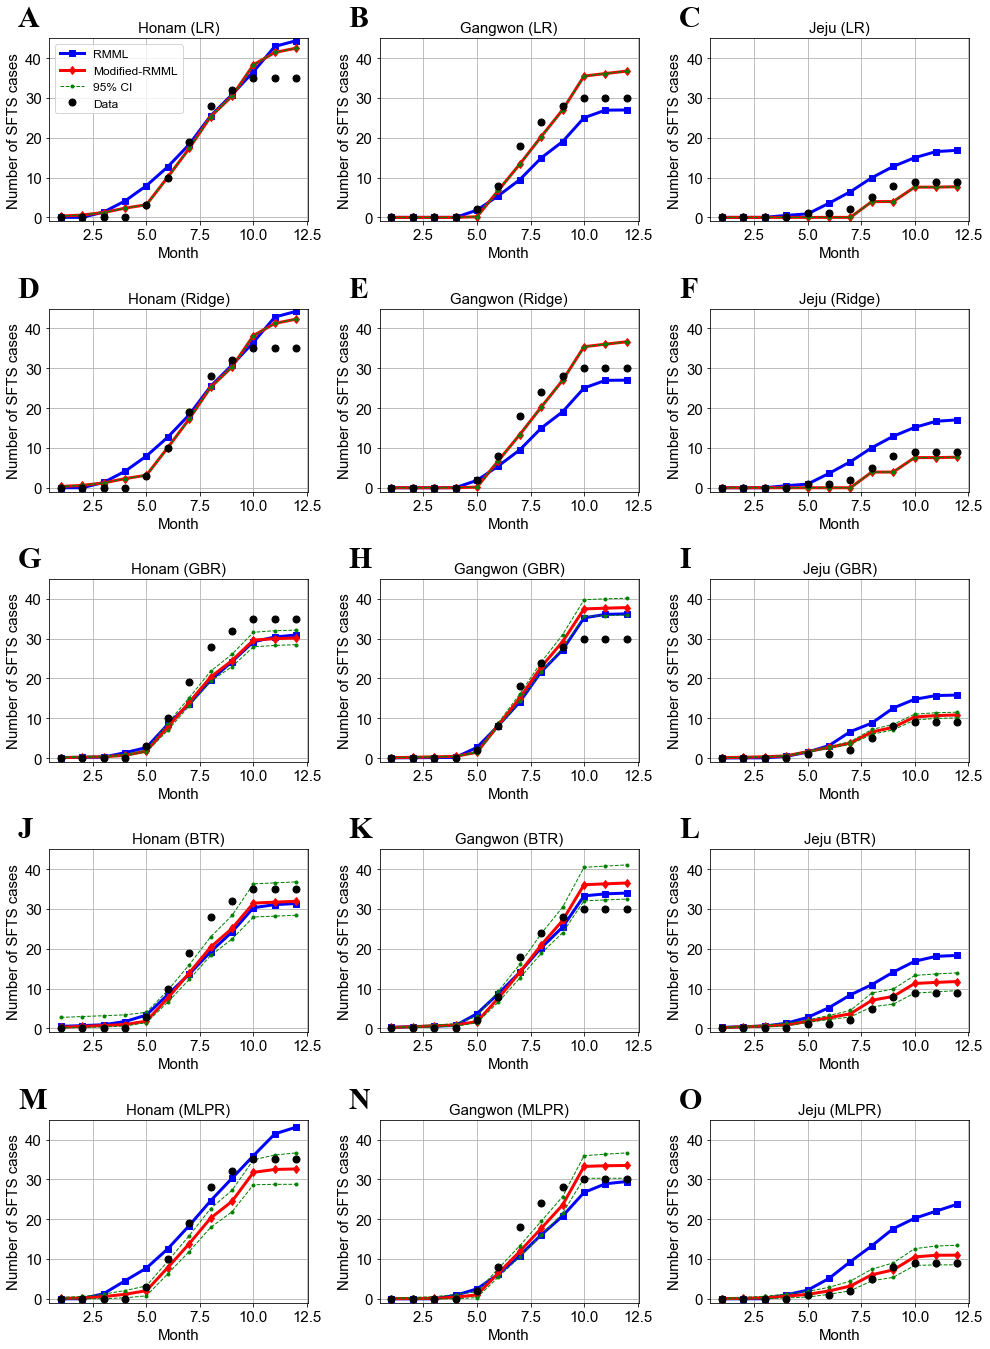

In [34]:
num=1
num_j=1;
plt.figure(figsize=(14,19))
for j in machine_values_new:
    for i in list(collections.Counter(CMP_sum['Area']).keys())[4:7]:
        plt.subplot(len(machine_values_new),len(list(collections.Counter(CMP_sum['Area']).keys())[4:7]),num)
        x = CMP_sum.loc[CMP_sum['Area']==i,'Month']
        y = CMP_sum.loc[CMP_sum['Area']==i,'Incidence']
        y_pre = CMP_sum.loc[CMP_sum['Area']==i,j+'_mean']
        y_pre1 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_mean']
        y_pre2 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95+']
        y_pre3 = CMP_sum_2.loc[CMP_sum_2['Area']==i,j+'_95-']
        lines = plt.plot(x, y_pre, 'bs-',x, y_pre1,'rd-',x, y_pre2,'--.g', x, y_pre3,'--.g',x, y, 'ok')
        
        plt.setp(lines[0], linewidth=3)
        plt.setp(lines[1], linewidth=3)
        plt.setp(lines[2], linewidth=1)
        plt.setp(lines[3], linewidth=1)
        plt.setp(lines[4], markersize=7)
        
        font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
        plt.text(-1, 48, chr(64+num), fontdict=font2)
        
        plt.xlabel('Month')
        plt.ylabel('Number of SFTS cases')
        plt.ylim([-1, 45])
        plt.grid(True)
        if (num==1):
            plt.legend(handles=(lines[0],lines[1],lines[2],lines[4]),labels=('RMML', 'Modified-RMML', '95% CI','Data'), fontsize=12,loc='best')#'upper right')
#             plt.legend(('Data', 'Estimation', 'Modified_estimation', '95% CI'), fontsize=10,loc='best')#'upper right')
        plt.rc('axes', titlesize=15)
        plt.title(i + ' (' + j + ')')
        plt.tight_layout()
        num=num+1
plt.show()

In [35]:
Result_ACC=pd.DataFrame(columns={'Estimator'})

In [36]:
result_sum.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

In [37]:
result_sum_2.rename(columns = {'linear_mean' : 'LR_mean',
                             'linear_95+' : 'LR_95+',
                            'linear_95-' : 'LR_95-'},inplace = True)

In [38]:
num=0
for i in machine_values_new:
    Result_ACC.loc[num,'Estimator']=i
    Result_ACC.loc[num,'train_accuracy_1']=((result_sum['Incidence']-result_sum[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'test_accuracy_1']=((predict_sum['Incidence']-predict_sum[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'R_square_train1']=r2_score(result_sum['Incidence'], result_sum[i+'_mean'])
    Result_ACC.loc[num,'R_square_test1']=r2_score(predict_sum['Incidence'], predict_sum[i+'_mean'])
    num=num+1

In [39]:
num=0
for i in machine_values_new:
    Result_ACC.loc[num,'train_accuracy_2']=((result_sum_2['Incidence']-result_sum_2[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'test_accuracy_2']=((predict_sum_2['Incidence']-predict_sum_2[i+'_mean'])**2).mean()
    Result_ACC.loc[num,'R_square_train2']=r2_score(result_sum_2['Incidence'], result_sum_2[i+'_mean'])
    Result_ACC.loc[num,'R_square_test2']=r2_score(predict_sum_2['Incidence'], predict_sum_2[i+'_mean'])
    num=num+1

In [40]:
Result_ACC

,Estimator,train_accuracy_1,test_accuracy_1,R_square_train1,R_square_test1,train_accuracy_2,test_accuracy_2,R_square_train2,R_square_test2
0,LR,11.047995,6.454692,0.386525,0.516864,6.557519,4.175224,0.635873,0.687483
1,Ridge,11.053812,6.452449,0.386202,0.517031,6.561509,4.161505,0.635651,0.688510
2,GBR,0.414568,3.601057,0.976980,0.730459,0.187379,3.126838,0.989595,0.765955
3,BTR,2.652604,3.325097,0.852706,0.751115,1.373285,2.936509,0.923744,0.780201
4,MLPR,11.191923,6.660041,0.378533,0.501493,2.329471,3.189539,0.870649,0.761262


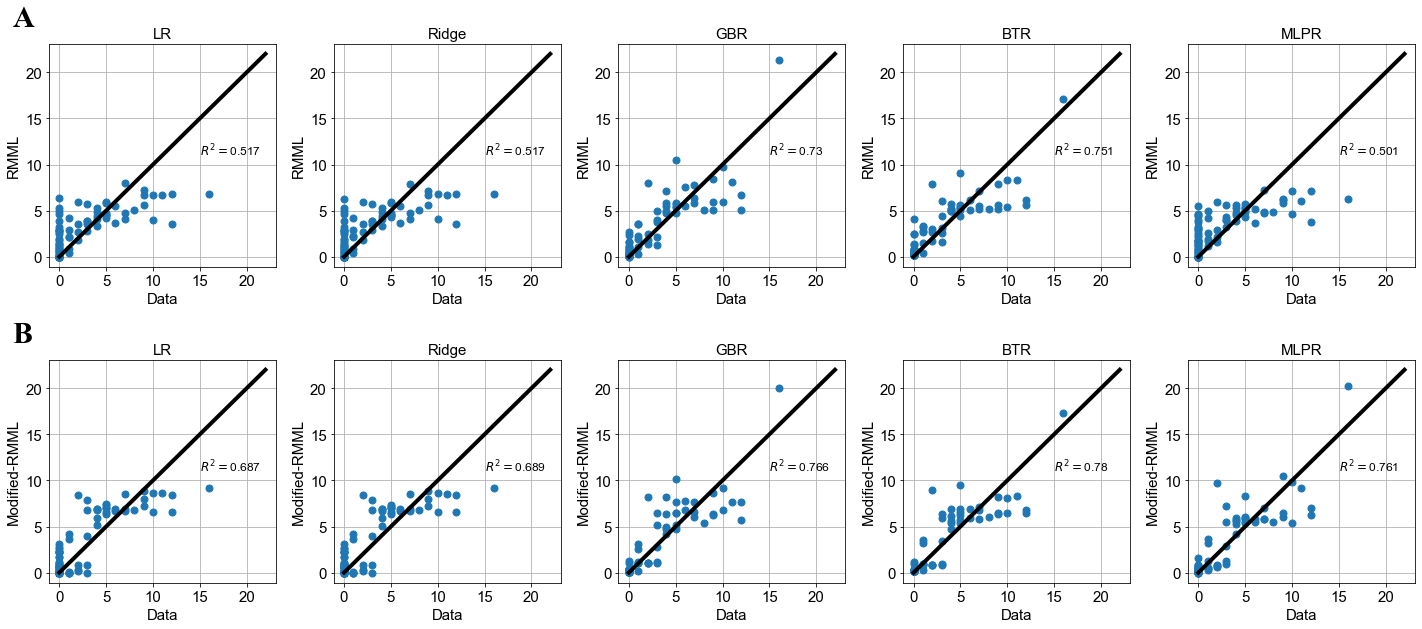

In [41]:
plt.figure(figsize=(20,9))
font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
for i in range(2):
    if (i==0):
        num=1
        num_j=1;
        for j in machine_values_new:
#     Result_ACC.loc[num-1,'R_square_test1']=r2_score(predict_sum['Incidence'], predict_sum[j+'_mean'])
            plt.subplot(2,len(machine_values_new),num)
            x = np.linspace(0,22)
            y = x
            lines=plt.plot(predict_sum['Incidence'],predict_sum[j+'_mean'],'o',x,y,'k')
            plt.setp(lines[0], markersize=7)
            plt.setp(lines[1], linewidth=4)
            plt.xlabel('Data')
            plt.ylabel('RMML')
            plt.title(j)
            plt.grid(True)
            plt.text(15, 11, r'$R^2=$'+ str(round(Result_ACC.loc[num-1,'R_square_test1'],3)), fontsize=12)
            font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
            if (num==1):
                plt.text(-5, 25, 'A', fontdict=font2)
            plt.tight_layout()
            num=num+1
    else:
        num=1
        for j in machine_values_new:
#     Result_ACC.loc[num-1,'R_square_test1']=r2_score(predict_sum_2['Incidence'], predict_sum_2[j+'_mean'])
            plt.subplot(2,len(machine_values_new),num+5)
            x = np.linspace(0,22)
            y = x
            lines=plt.plot(predict_sum_2['Incidence'],predict_sum_2[j+'_mean'],'o',x,y,'k')
            plt.setp(lines[0], markersize=7)
            plt.setp(lines[1], linewidth=4)
            plt.xlabel('Data')
            plt.ylabel('Modified-RMML')
            plt.text(15, 11, r'$R^2=$'+ str(round(Result_ACC.loc[num-1,'R_square_test2'],3)), fontsize=12)
            plt.title(j)
            plt.grid(True)
            font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
            if (num==1):
                plt.text(-5, 25, 'B', fontdict=font2)
            plt.tight_layout()
            num=num+1
plt.show()
        

In [42]:
FI_C=pd.read_excel('Feature_Importance_RMML.xlsx')
FI_C2=pd.read_excel('Feature_Importance_M_RMML.xlsx')

In [43]:
for i in range(len(FI_C)):
    FI_C.loc[i,'mean']=FI_C.loc[i,FI_C.columns[1:]].mean()
for i in range(len(FI_C2)):
    FI_C2.loc[i,'mean']=FI_C2.loc[i,FI_C2.columns[1:]].mean()

In [44]:
model=['RMML','Modified-RMML']

In [45]:
FI_C['Feature']

0                             Month
1       Average maximum temperature
2         Average relative humidity
3                     Precipitation
4    Average percentage of sunshine
5                        Population
6                  Mountain visitor
Name: Feature, dtype: object

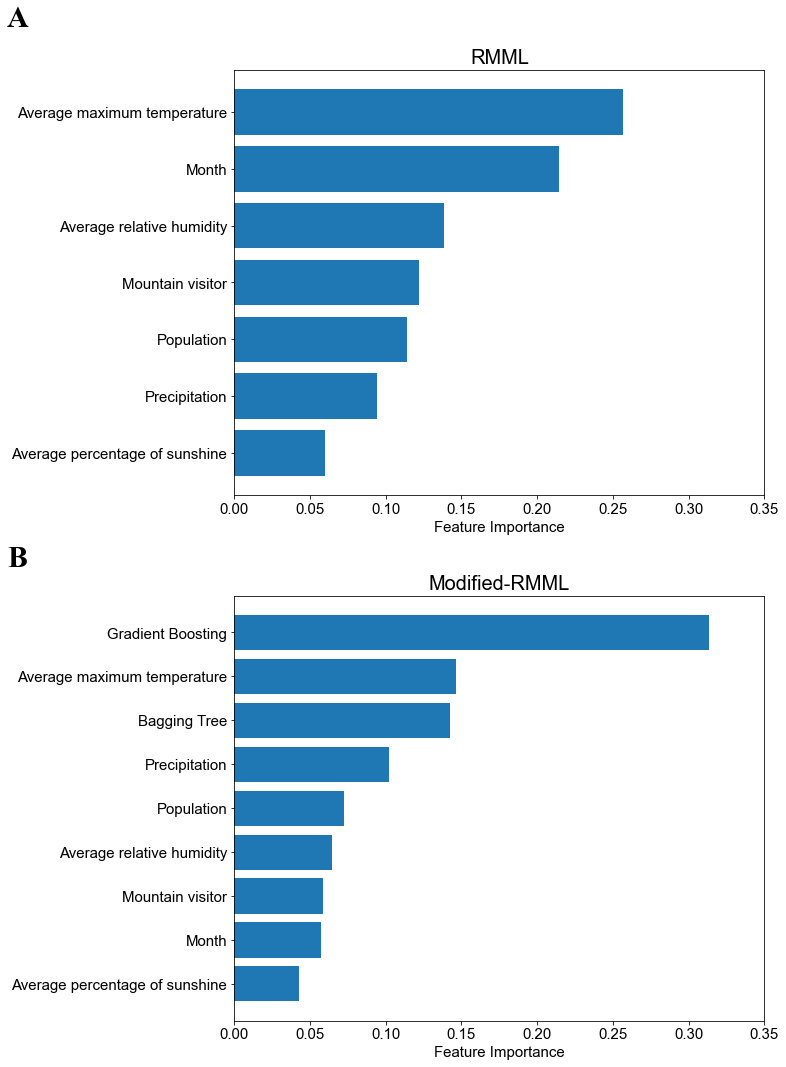

In [46]:
plt.figure(figsize=(12,15))
font2 = {'family': 'Times New Roman','color':'k','weight': 'bold','size': 30}
for j in range(2):
    plt.subplot(2,1,j+1)
    if (j==0):
        feature_importance=FI_C['mean']
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(FI_C['Feature'])[sorted_idx])
        plt.xlim([0, 0.35])
        plt.xlabel('Feature Importance')
        plt.rc('axes', titlesize=20)
        plt.title('RMML')
        plt.text(-0.15, 8, 'A', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'
    else:
        feature_importance=FI_C2['mean']
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(FI_C2['Feature'])[sorted_idx])
        plt.xlim([0, 0.35])
        plt.xlabel('Feature Importance')
        plt.rc('axes', titlesize=20)
        plt.title('Modified-RMML')
        plt.text(-0.15, 10, 'B', fontdict=font2)
        plt.rcParams['font.family'] = 'Arial'
plt.tight_layout()
plt.show()